## **Imports**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder , MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.datasets import fetch_kddcup99

## **Load Data**

In [2]:
X , y = fetch_kddcup99(return_X_y=True , as_frame=True)
X.shape , y.shape

((494021, 41), (494021,))

In [3]:
X.dtypes

duration                       object
protocol_type                  object
service                        object
flag                           object
src_bytes                      object
dst_bytes                      object
land                           object
wrong_fragment                 object
urgent                         object
hot                            object
num_failed_logins              object
logged_in                      object
num_compromised                object
root_shell                     object
su_attempted                   object
num_root                       object
num_file_creations             object
num_shells                     object
num_access_files               object
num_outbound_cmds              object
is_host_login                  object
is_guest_login                 object
count                          object
srv_count                      object
serror_rate                    object
srv_serror_rate                object
rerror_rate 

## **Train_Test_Split**

In [4]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=0 , stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(395216, 41)
(98805, 41)
(395216,)
(98805,)


## **Missing Values**

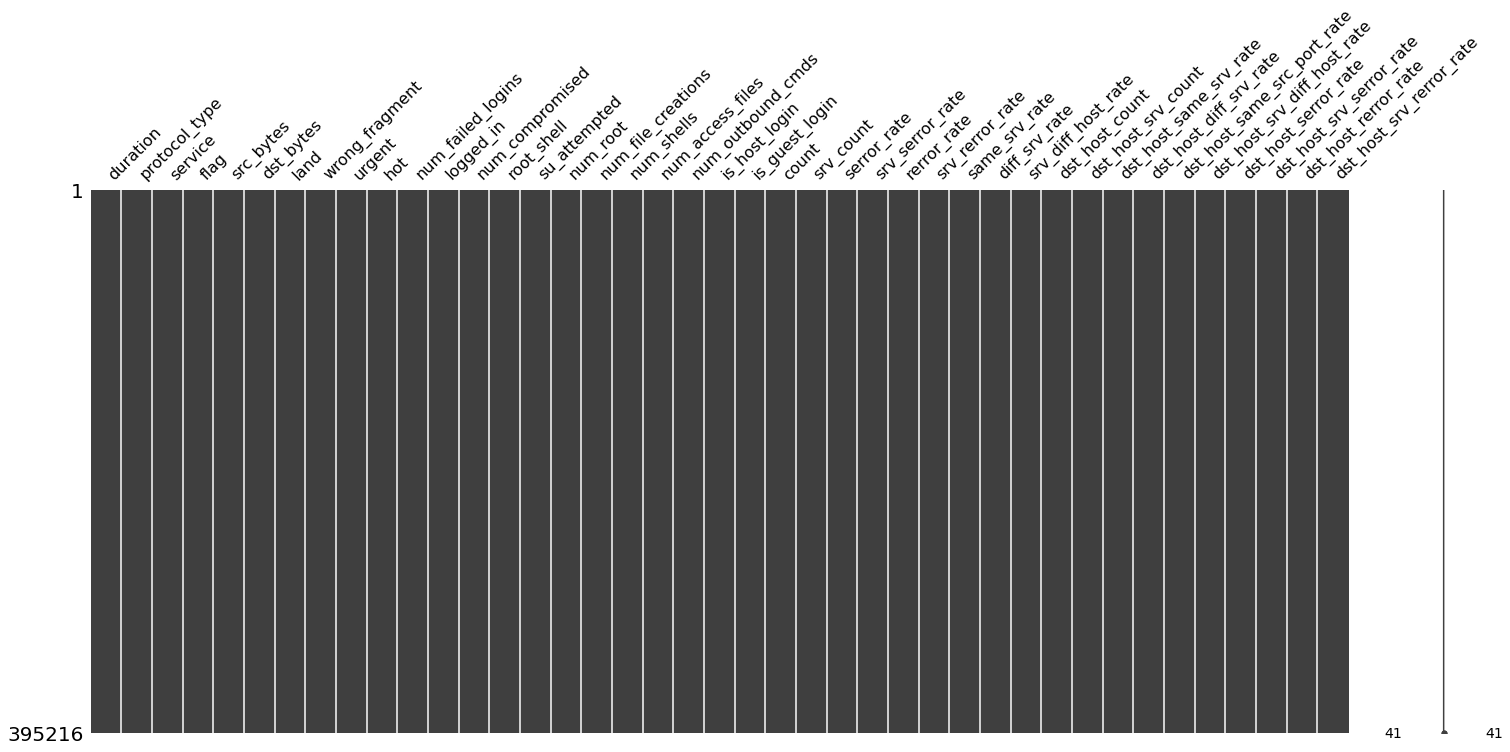

In [5]:
msno.matrix(X_train);

In [6]:
X.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [7]:
y.isnull().sum()

0

## **Encoding Categorical Features**

In [8]:
columns = X_train.columns

In [9]:
for col in columns:
    print(X_train[col].value_counts())
    print('--'*20)

0        385274
1          1961
2           698
3           523
5           435
          ...  
2946          1
8021          1
21887         1
596           1
1481          1
Name: duration, Length: 2150, dtype: int64
----------------------------------------
b'icmp'    226881
b'tcp'     152134
b'udp'      16201
Name: protocol_type, dtype: int64
----------------------------------------
b'ecr_i'      225111
b'private'     88659
b'http'        51462
b'smtp'         7826
b'other'        5787
               ...  
b'urh_i'          12
b'X11'             8
b'tim_i'           6
b'pm_dump'         1
b'red_i'           1
Name: service, Length: 65, dtype: int64
----------------------------------------
b'SF'        302745
b'S0'         69537
b'REJ'        21572
b'RSTR'         721
b'RSTO'         465
b'SH'            88
b'S1'            44
b'S2'            19
b'S3'            10
b'RSTOS0'         8
b'OTH'            7
Name: flag, dtype: int64
----------------------------------------
1032     1823

In [10]:
X_train.iloc[: , 0] = X_train.iloc[: , 0].astype('float')
X_train.iloc[: , 1:4] = X_train.iloc[: , 1:4].astype('category')

In [11]:
X_train.iloc[: , 4:] = X_train.iloc[: , 4:].astype('float')
X_train.dtypes

duration                        float64
protocol_type                  category
service                        category
flag                           category
src_bytes                       float64
dst_bytes                       float64
land                            float64
wrong_fragment                  float64
urgent                          float64
hot                             float64
num_failed_logins               float64
logged_in                       float64
num_compromised                 float64
root_shell                      float64
su_attempted                    float64
num_root                        float64
num_file_creations              float64
num_shells                      float64
num_access_files                float64
num_outbound_cmds               float64
is_host_login                   float64
is_guest_login                  float64
count                           float64
srv_count                       float64
serror_rate                     float64


In [12]:
y_train.value_counts()

b'smurf.'              224632
b'neptune.'             85761
b'normal.'              77822
b'back.'                 1762
b'satan.'                1271
b'ipsweep.'               998
b'portsweep.'             832
b'warezclient.'           816
b'teardrop.'              783
b'pod.'                   211
b'nmap.'                  185
b'guess_passwd.'           42
b'buffer_overflow.'        24
b'land.'                   17
b'warezmaster.'            16
b'imap.'                   10
b'rootkit.'                 8
b'loadmodule.'              7
b'multihop.'                6
b'ftp_write.'               6
b'phf.'                     3
b'perl.'                    2
b'spy.'                     2
Name: labels, dtype: int64

In [13]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
276224,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
193819,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
283360,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
437438,0.0,b'icmp',b'ecr_i',b'SF',520.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
44751,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83534,0.0,b'tcp',b'http',b'SF',321.0,398.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
87170,0.0,b'tcp',b'smtp',b'SF',1171.0,339.0,0.0,0.0,0.0,0.0,...,132.0,144.0,0.52,0.03,0.01,0.01,0.01,0.01,0.0,0.0
127679,0.0,b'tcp',b'private',b'S0',0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,2.0,0.01,0.08,0.00,0.00,1.00,1.00,0.0,0.0
96390,0.0,b'icmp',b'ecr_i',b'SF',1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0


In [14]:
X_train2 = X_train.copy()
columns = X_train2.select_dtypes(include='category').columns

le1 = LabelEncoder()
X_train2[columns[0]] = le1.fit_transform(X_train2[columns[0]])
print(le1.classes_)

le2 = LabelEncoder()
X_train2[columns[1]] = le2.fit_transform(X_train2[columns[1]])
print(le2.classes_)

le3 = LabelEncoder()
X_train2[columns[2]] = le3.fit_transform(X_train2[columns[2]])
print(le3.classes_)

X_train2

[b'icmp' b'tcp' b'udp']
[b'IRC' b'X11' b'Z39_50' b'auth' b'bgp' b'courier' b'csnet_ns' b'ctf'
 b'daytime' b'discard' b'domain' b'domain_u' b'echo' b'eco_i' b'ecr_i'
 b'efs' b'exec' b'finger' b'ftp' b'ftp_data' b'gopher' b'hostnames'
 b'http' b'http_443' b'imap4' b'iso_tsap' b'klogin' b'kshell' b'ldap'
 b'link' b'login' b'mtp' b'name' b'netbios_dgm' b'netbios_ns'
 b'netbios_ssn' b'netstat' b'nnsp' b'nntp' b'ntp_u' b'other' b'pm_dump'
 b'pop_2' b'pop_3' b'printer' b'private' b'red_i' b'remote_job' b'rje'
 b'shell' b'smtp' b'sql_net' b'ssh' b'sunrpc' b'supdup' b'systat'
 b'telnet' b'tim_i' b'time' b'urh_i' b'urp_i' b'uucp' b'uucp_path'
 b'vmnet' b'whois']
[b'OTH' b'REJ' b'RSTO' b'RSTOS0' b'RSTR' b'S0' b'S1' b'S2' b'S3' b'SF'
 b'SH']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
276224,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
193819,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
283360,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
437438,0.0,0,14,9,520.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
44751,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83534,0.0,1,22,9,321.0,398.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
87170,0.0,1,50,9,1171.0,339.0,0.0,0.0,0.0,0.0,...,132.0,144.0,0.52,0.03,0.01,0.01,0.01,0.01,0.0,0.0
127679,0.0,1,45,5,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,2.0,0.01,0.08,0.00,0.00,1.00,1.00,0.0,0.0
96390,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0


In [15]:
ley = LabelEncoder()
y_train2 = y_train.copy()

y_train2 = ley.fit_transform(y_train2)
print(ley.classes_)
y_train2

[b'back.' b'buffer_overflow.' b'ftp_write.' b'guess_passwd.' b'imap.'
 b'ipsweep.' b'land.' b'loadmodule.' b'multihop.' b'neptune.' b'nmap.'
 b'normal.' b'perl.' b'phf.' b'pod.' b'portsweep.' b'rootkit.' b'satan.'
 b'smurf.' b'spy.' b'teardrop.' b'warezclient.' b'warezmaster.']


array([18, 18, 18, ...,  9, 18,  9])

## **EDA**

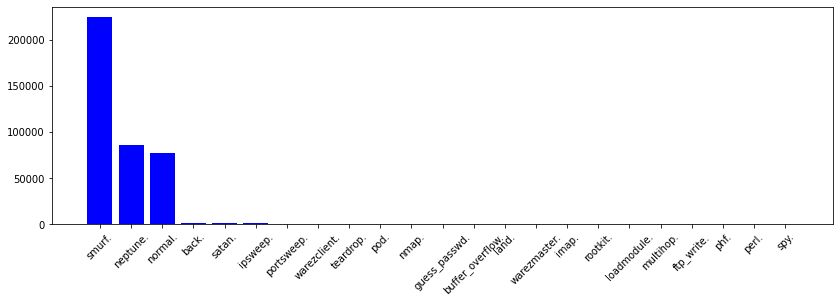

In [16]:
plt.figure(figsize=(14 , 4))

index = y_train.value_counts().index
value = y_train.value_counts().values

plt.bar(index , value , color='b');
plt.xticks(rotation=45);

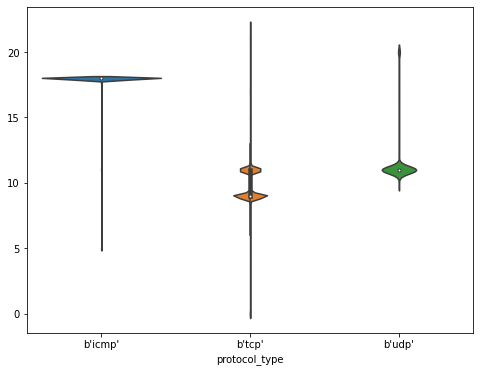

In [17]:
plt.figure(figsize=(8 , 6))
sns.violinplot(x=X_train.iloc[: , 1] , y=y_train2);

#### * Correlation

In [18]:
train_set = X_train2.copy()
train_set['target'] = y_train2
train_set

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
276224,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,18
193819,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,18
283360,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,18
437438,0.0,0,14,9,520.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,18
44751,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83534,0.0,1,22,9,321.0,398.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,11
87170,0.0,1,50,9,1171.0,339.0,0.0,0.0,0.0,0.0,...,144.0,0.52,0.03,0.01,0.01,0.01,0.01,0.0,0.0,11
127679,0.0,1,45,5,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.01,0.08,0.00,0.00,1.00,1.00,0.0,0.0,9
96390,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0,18


In [19]:
corr = train_set.corr()
corr[['target']].abs().sort_values(by='target')

,target
src_bytes,0.000490
urgent,0.001110
su_attempted,0.002954
num_root,0.005448
is_guest_login,0.008456
num_shells,0.008830
num_file_creations,0.011185
dst_bytes,0.012506
land,0.013410
num_compromised,0.013567


## **Data/Feature Reduction**

In [20]:
X_train2.drop(['num_outbound_cmds','is_host_login','src_bytes' , 'urgent' , 
              'su_attempted','num_root' , 'is_guest_login' , 'num_shells' ,
              'num_file_creations' , 'dst_bytes' , 'land' , 'num_compromised',
              'hot' , 'root_shell' , 'num_failed_logins' , 'num_access_files' ,
              'duration' , 'wrong_fragment'] , axis=1 , inplace=True)

In [21]:
X_train2

,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
276224,0,14,9,0.0,511.0,511.0,0.0,0.00,0.0,0.00,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
193819,0,14,9,0.0,510.0,510.0,0.0,0.00,0.0,0.00,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
283360,0,14,9,0.0,511.0,511.0,0.0,0.00,0.0,0.00,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
437438,0,14,9,0.0,511.0,511.0,0.0,0.00,0.0,0.00,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
44751,0,14,9,0.0,510.0,510.0,0.0,0.00,0.0,0.00,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83534,1,22,9,1.0,13.0,17.0,0.0,0.06,0.0,0.06,...,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
87170,1,50,9,1.0,1.0,1.0,0.0,0.00,0.0,0.00,...,132.0,144.0,0.52,0.03,0.01,0.01,0.01,0.01,0.0,0.0
127679,1,45,5,0.0,239.0,2.0,1.0,1.00,0.0,0.00,...,255.0,2.0,0.01,0.08,0.00,0.00,1.00,1.00,0.0,0.0
96390,0,14,9,0.0,511.0,511.0,0.0,0.00,0.0,0.00,...,255.0,255.0,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0


In [22]:
X_train2.columns

Index(['protocol_type', 'service', 'flag', 'logged_in', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')

## **Data Normalization**

In [23]:
scalerX = MinMaxScaler()
X_train2[['count' , 'srv_count' , 'dst_host_count'
          , 'dst_host_srv_count']] = scalerX.fit_transform(X_train2[['count' , 'srv_count' ,
                                                                     'dst_host_count', 'dst_host_srv_count']])

In [24]:
X_train2

,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
276224,0,14,9,0.0,1.000000,1.000000,0.0,0.00,0.0,0.00,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
193819,0,14,9,0.0,0.998043,0.998043,0.0,0.00,0.0,0.00,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
283360,0,14,9,0.0,1.000000,1.000000,0.0,0.00,0.0,0.00,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
437438,0,14,9,0.0,1.000000,1.000000,0.0,0.00,0.0,0.00,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
44751,0,14,9,0.0,0.998043,0.998043,0.0,0.00,0.0,0.00,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83534,1,22,9,1.0,0.025440,0.033268,0.0,0.06,0.0,0.06,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
87170,1,50,9,1.0,0.001957,0.001957,0.0,0.00,0.0,0.00,...,0.517647,0.564706,0.52,0.03,0.01,0.01,0.01,0.01,0.0,0.0
127679,1,45,5,0.0,0.467710,0.003914,1.0,1.00,0.0,0.00,...,1.000000,0.007843,0.01,0.08,0.00,0.00,1.00,1.00,0.0,0.0
96390,0,14,9,0.0,1.000000,1.000000,0.0,0.00,0.0,0.00,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.0


## **Model Selection**

In [25]:
x_train , x_valid , y_train , y_valid = train_test_split(X_train2 , y_train2 , test_size=0.1 , random_state=0 , stratify=y_train2)

In [26]:
model = KNeighborsClassifier()
model.fit(x_train , y_train)

KNeighborsClassifier()

In [27]:
y_hat = model.predict(x_valid)
print(f'Accuracy on valid data is: {accuracy_score(y_valid , y_hat)}')

Accuracy on valid data is: 0.9984312534790749


In [28]:
cf_matrix = confusion_matrix(y_valid , y_hat)

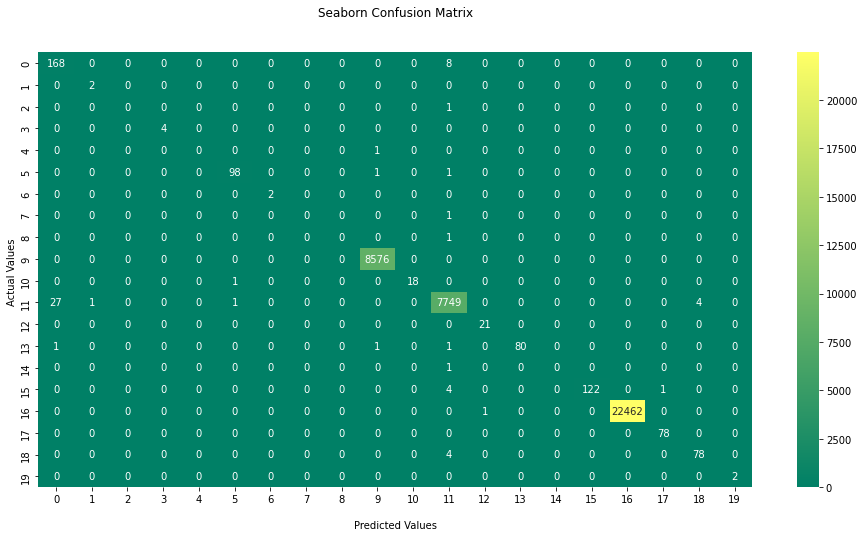

In [29]:
plt.figure(figsize = (16 , 8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='summer')

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

In [30]:
model2 = KNeighborsClassifier(100)
model2.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=100)

In [31]:
y_hat = model2.predict(x_valid)
print(f'Accuracy on valid data is: {accuracy_score(y_valid , y_hat)}')

Accuracy on valid data is: 0.9962299478771317


In [32]:
cf_matrix = confusion_matrix(y_valid , y_hat)

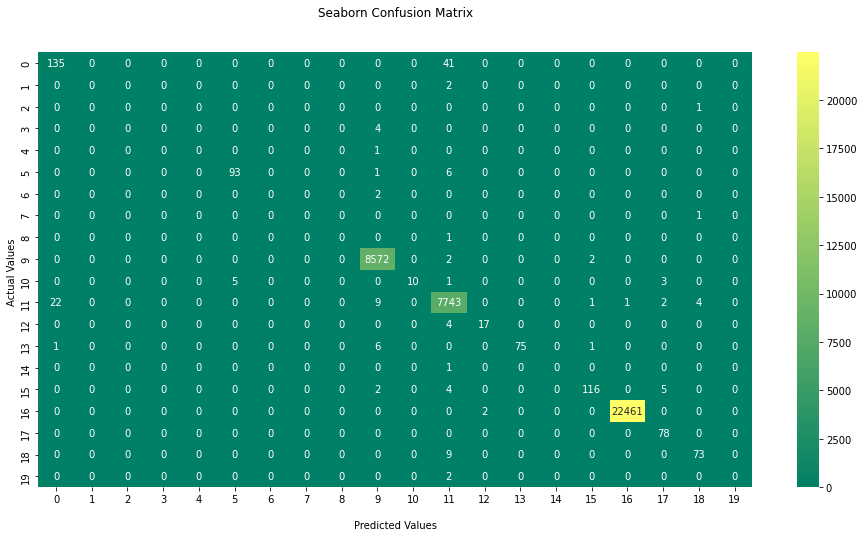

In [33]:
plt.figure(figsize = (16 , 8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='summer')

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## **Test**

### ***Encoding Categorical Features***

In [34]:
X_test.iloc[: , 0] = X_test.iloc[: , 0].astype('float')
X_test.iloc[: , 1:4] = X_test.iloc[: , 1:4].astype('category')

In [35]:
X_test.iloc[: , 4:] = X_test.iloc[: , 4:].astype('float')
X_test.dtypes

duration                        float64
protocol_type                  category
service                        category
flag                           category
src_bytes                       float64
dst_bytes                       float64
land                            float64
wrong_fragment                  float64
urgent                          float64
hot                             float64
num_failed_logins               float64
logged_in                       float64
num_compromised                 float64
root_shell                      float64
su_attempted                    float64
num_root                        float64
num_file_creations              float64
num_shells                      float64
num_access_files                float64
num_outbound_cmds               float64
is_host_login                   float64
is_guest_login                  float64
count                           float64
srv_count                       float64
serror_rate                     float64


In [36]:
columns = X_test.select_dtypes(include='category').columns

X_test[columns[0]] = le1.transform(X_test[columns[0]])
print(le1.classes_)

X_test[columns[1]] = le2.fit_transform(X_test[columns[1]])
print(le2.classes_)

X_test[columns[2]] = le3.transform(X_test[columns[2]])
print(le3.classes_)

X_test

[b'icmp' b'tcp' b'udp']
[b'IRC' b'X11' b'Z39_50' b'auth' b'bgp' b'courier' b'csnet_ns' b'ctf'
 b'daytime' b'discard' b'domain' b'domain_u' b'echo' b'eco_i' b'ecr_i'
 b'efs' b'exec' b'finger' b'ftp' b'ftp_data' b'gopher' b'hostnames'
 b'http' b'http_443' b'imap4' b'iso_tsap' b'klogin' b'kshell' b'ldap'
 b'link' b'login' b'mtp' b'name' b'netbios_dgm' b'netbios_ns'
 b'netbios_ssn' b'netstat' b'nnsp' b'nntp' b'ntp_u' b'other' b'pop_2'
 b'pop_3' b'printer' b'private' b'remote_job' b'rje' b'shell' b'smtp'
 b'sql_net' b'ssh' b'sunrpc' b'supdup' b'systat' b'telnet' b'tftp_u'
 b'tim_i' b'time' b'urh_i' b'urp_i' b'uucp' b'uucp_path' b'vmnet' b'whois']
[b'OTH' b'REJ' b'RSTO' b'RSTOS0' b'RSTR' b'S0' b'S1' b'S2' b'S3' b'SF'
 b'SH']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
295858,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
238393,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
178410,0.0,0,14,9,1032.0,0.0,0.0,0.0,0.0,0.0,...,255.0,255.0,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
381732,0.0,1,44,5,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,8.0,0.03,0.09,0.00,0.00,1.0,1.0,0.0,0.0
12034,0.0,1,22,9,235.0,1492.0,0.0,0.0,0.0,0.0,...,178.0,255.0,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380335,0.0,1,44,5,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,16.0,0.06,0.06,0.00,0.00,1.0,1.0,0.0,0.0
455916,0.0,1,44,4,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,1.0,0.00,1.00,1.00,0.00,0.0,0.0,1.0,1.0
467384,0.0,1,53,1,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,4.0,0.02,0.08,0.00,0.00,0.0,0.0,1.0,1.0
143448,0.0,2,11,9,46.0,136.0,0.0,0.0,0.0,0.0,...,255.0,254.0,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0


In [38]:
y_test = ley.transform(y_test)
print(ley.classes_)
y_test

[b'back.' b'buffer_overflow.' b'ftp_write.' b'guess_passwd.' b'imap.'
 b'ipsweep.' b'land.' b'loadmodule.' b'multihop.' b'neptune.' b'nmap.'
 b'normal.' b'perl.' b'phf.' b'pod.' b'portsweep.' b'rootkit.' b'satan.'
 b'smurf.' b'spy.' b'teardrop.' b'warezclient.' b'warezmaster.']


array([18, 18, 18, ...,  9, 11,  9])

### ***Data/Feature Reduction***


In [37]:
X_test.drop(['num_outbound_cmds','is_host_login','src_bytes' , 'urgent' , 
              'su_attempted','num_root' , 'is_guest_login' , 'num_shells' ,
              'num_file_creations' , 'dst_bytes' , 'land' , 'num_compromised',
              'hot' , 'root_shell' , 'num_failed_logins' , 'num_access_files' ,
              'duration' , 'wrong_fragment'] , axis=1 , inplace=True)
X_test.shape

(98805, 23)

### ***Data Normalization***

In [39]:
X_test[['count' , 'srv_count' , 'dst_host_count'
          , 'dst_host_srv_count']] = scalerX.fit_transform(X_test[['count' , 'srv_count' ,
                                                                     'dst_host_count', 'dst_host_srv_count']])

X_test

,protocol_type,service,flag,logged_in,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
295858,0,14,9,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
238393,0,14,9,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
178410,0,14,9,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0
381732,1,44,5,0.0,0.045098,0.013725,1.0,1.0,0.0,0.0,...,1.000000,0.031373,0.03,0.09,0.00,0.00,1.0,1.0,0.0,0.0
12034,1,22,9,1.0,0.011765,0.011765,0.0,0.0,0.0,0.0,...,0.698039,1.000000,1.00,0.00,0.01,0.01,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380335,1,44,5,0.0,0.484314,0.029412,1.0,1.0,0.0,0.0,...,1.000000,0.062745,0.06,0.06,0.00,0.00,1.0,1.0,0.0,0.0
455916,1,44,4,0.0,0.000000,0.000000,0.0,0.0,1.0,1.0,...,1.000000,0.003922,0.00,1.00,1.00,0.00,0.0,0.0,1.0,1.0
467384,1,53,1,0.0,0.405882,0.005882,0.0,0.0,1.0,1.0,...,1.000000,0.015686,0.02,0.08,0.00,0.00,0.0,0.0,1.0,1.0
143448,2,11,9,0.0,0.049020,0.176471,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.00,0.00,0.0,0.0,0.0,0.0


In [40]:
y_hat_test = model.predict(X_test)
print(f'Accuracy on valid data is: {accuracy_score(y_test , y_hat_test)}')

Accuracy on valid data is: 0.9984717372602601


In [41]:
cf_matrix = confusion_matrix(y_test , y_hat_test)

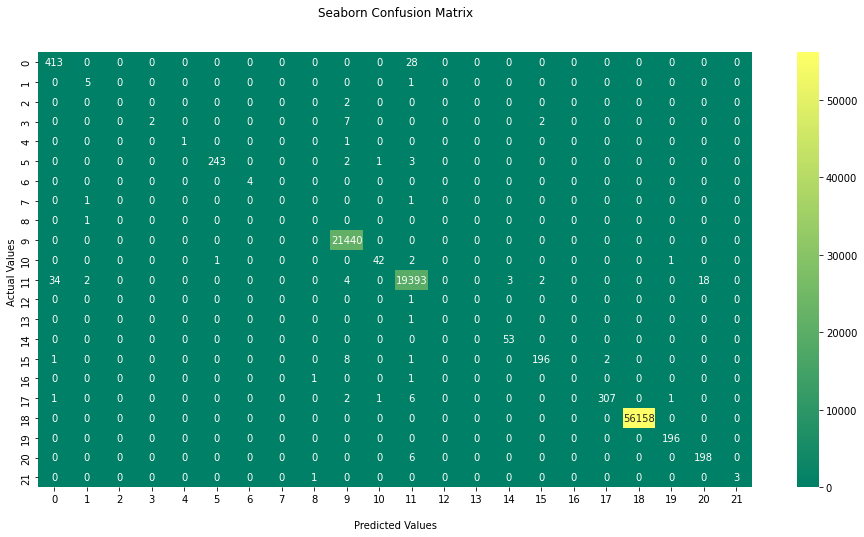

In [42]:
plt.figure(figsize = (16 , 8))
ax = sns.heatmap(cf_matrix, annot=True, fmt='', cmap='summer')

ax.set_title('Seaborn Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');